In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,te;q=0.6,ru;q=0.5" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585385694&Signature=dR4rseKUL7LJR%2BMw9e5H5h2BXwGE6b0%2FLLnbnErcQj9XI%2FJ954K50ZLfUWmSlQSW7rF0ifxC5dJuVHQK2GB2k50NUgMXUI6%2Fk4YCNj6y9P8iikWuEgCBsprDClcdKLq8iNtowRcFRwk6RFQQeFTaZpvN2t8DQYwFcrTQrLD2OaU9itX4Z5HNXSwo6myy36EXBAigT18Ey%2B145JgfAI0XYl%2FPyeeGYmUtP4zuP2c%2FWRZmhINr16mnCQOmaLTk%2BxAwWK2dTwrnCxKj6Gbd%2FSaQS%2BUsnrBheS3XTE52rJEwhpURk2DWhcwaUvLrWIz7abAdxIS27TiXYGKom4IcWjRj%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip" -O "test_stg2.tsv.zip" -c

--2020-03-25 08:55:21--  https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585385694&Signature=dR4rseKUL7LJR%2BMw9e5H5h2BXwGE6b0%2FLLnbnErcQj9XI%2FJ954K50ZLfUWmSlQSW7rF0ifxC5dJuVHQK2GB2k50NUgMXUI6%2Fk4YCNj6y9P8iikWuEgCBsprDClcdKLq8iNtowRcFRwk6RFQQeFTaZpvN2t8DQYwFcrTQrLD2OaU9itX4Z5HNXSwo6myy36EXBAigT18Ey%2B145JgfAI0XYl%2FPyeeGYmUtP4zuP2c%2FWRZmhINr16mnCQOmaLTk%2BxAwWK2dTwrnCxKj6Gbd%2FSaQS%2BUsnrBheS3XTE52rJEwhpURk2DWhcwaUvLrWIz7abAdxIS27TiXYGKom4IcWjRj%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308669128 (294M) [application/zip]
Saving to: ‘test_stg2.tsv.zip’

test_stg2.tsv.zip   100%[===========

In [0]:
!unzip '/content/test_stg2.tsv.zip'

Archive:  /content/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
from wordcloud import STOPWORDS
from scipy.sparse import csr_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
test2=pd.read_table('/content/test_stg2.tsv',sep='\t')
test2.to_csv('/content/mercari_test.csv',index=False)

In [0]:
del test2

In [0]:
train_data=pd.read_csv("/content/drive/My Drive/mercani_train.csv")
train_data.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [0]:
train_data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [0]:
print("Number of Nan values in category_name: {}%".format((train_data['category_name'].isnull().sum()/train_data.shape[0])*100))
print("Number of Nan values in brand_name: {}%".format((train_data['brand_name'].isnull().sum()/train_data.shape[0])*100))
print("Number of Nan values in item_description: {}%".format((train_data['item_description'].isnull().sum()/train_data.shape[0])*100))

Number of Nan values in category_name: 0.42676901388500105%
Number of Nan values in brand_name: 42.675687251902986%
Number of Nan values in item_description: 0.0002698081326916397%


In [0]:
train_data = train_data[train_data['price'] > 0].reset_index(drop=True)
train_data,cv_data=train_test_split(train_data,test_size=0.1,random_state=42)
print(train_data.shape)
print(cv_data.shape)

(1333494, 8)
(148167, 8)


In [0]:
train=train_data.copy()
val=cv_data.copy()

In [ ]:
#We can see that our data consists of Null values.
#As a formost step we need to fill the Null values with the most prominent values.
#We can see the category name consists of three subcategories in each row as a preprocessing step
#let's make them into three different categories and filling the Nan values with empty string values.

In [ ]:
#Handling Nan Values

In [0]:
def handle_category(data):
  """this function splits the category_name into further three sub_categories."""
  cat1=[]
  cat2=[]
  cat3=[]
  i=0
  for row in data:
    try:
      categories=row.split('/')
    except:
      categories=['','','']
    cat1.append(categories[0])
    cat2.append(categories[1])
    cat3.append(categories[2])
    i+=1
  return cat1,cat2,cat3

In [0]:
c1,c2,c3=handle_category(train_data['category_name'])
train_data['sub_category1']=c1
train_data['sub_category2']=c2
train_data['sub_category3']=c3
c1,c2,c3=handle_category(cv_data['category_name'])
cv_data['sub_category1']=c1
cv_data['sub_category2']=c2
cv_data['sub_category3']=c3

In [0]:
train_data['item_description'].fillna(value='No description given',inplace=True)
train_data['brand_name'].fillna(value='Not known',inplace=True)
train_data.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name        5661
brand_name              0
price                   0
shipping                0
item_description        0
sub_category1           0
sub_category2           0
sub_category3           0
dtype: int64

In [0]:
cv_data['item_description'].fillna(value='No description given',inplace=True)
cv_data['brand_name'].fillna(value='Not known',inplace=True)
cv_data.isnull().sum()

train_id               0
name                   0
item_condition_id      0
category_name        653
brand_name             0
price                  0
shipping               0
item_description       0
sub_category1          0
sub_category2          0
sub_category3          0
dtype: int64

In [ ]:
#Loading Testing Data

In [0]:
test_data=pd.read_csv("/content/mercari_test.csv")
test_data.head(3)
test=test_data.copy()

In [0]:
print("shape of the test data: ",test_data.shape)
test_data.isnull().sum()

shape of the test data:  (3460725, 7)


test_id                    0
name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description           6
dtype: int64

In [0]:
print("Number of Nan values in category_name: {}%".format((test_data['category_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in brand_name: {}%".format((test_data['brand_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in item description: {}%".format((test_data['item_description'].isnull().sum()/test_data.shape[0])*100))

Number of Nan values in category_name: 0.4286096121477436%
Number of Nan values in brand_name: 42.66418163824054%
Number of Nan values in item description: 0.00017337407624125003%


In [ ]:
#Observations
#Here the test data is 3X times larger than training data.
#As Like as the training data, test data also contains Nan values except in item_description
#As we did in training data let's fill the Nan values with prominent values to handle missing values in test data.

In [0]:
c1,c2,c3=handle_category(test_data['category_name'])
test_data['sub_category1']=c1
test_data['sub_category2']=c2
test_data['sub_category3']=c3

In [0]:
test_data['brand_name'].fillna(value='Not known',inplace=True)
test_data['item_description'].fillna(value='No description given',inplace=True)
test_data.isnull().sum()

test_id                  0
name                     0
item_condition_id        0
category_name        14833
brand_name               0
shipping                 0
item_description         0
sub_category1            0
sub_category2            0
sub_category3            0
dtype: int64

Number of Unique Category1: 11


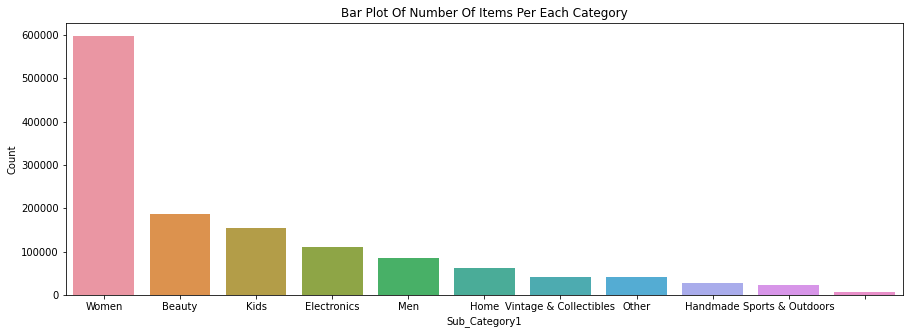

In [0]:
count=train_data['sub_category1'].value_counts()
print("Number of Unique Category1: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index,count)
plt.title("Bar Plot Of Number Of Items Per Each Category")
plt.xlabel('Sub_Category1')
plt.ylabel('Count')
plt.show()

In [ ]:
#We can see that the top three main categories of the products are women,Beauty and kids.
#Nearly 6 lakhs of products have women as main category.

Number Of Unique Category2: 114


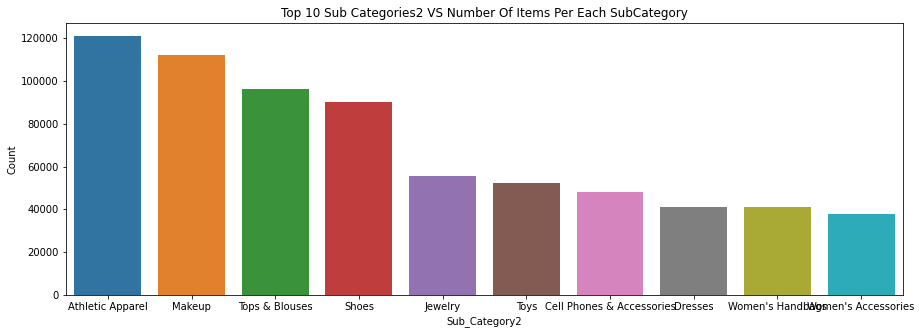

In [0]:
count=train_data['sub_category2'].value_counts()
print("Number Of Unique Category2: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category2')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories2 VS Number Of Items Per Each SubCategory")
plt.show()

In [ ]:
#Nearly 12 lakhs of products are Athletic Apparel
#Athletic Apparel, Makeup and Tops&Blouses are the top three repeating sub categories.

Number Of Unique Category3: 869


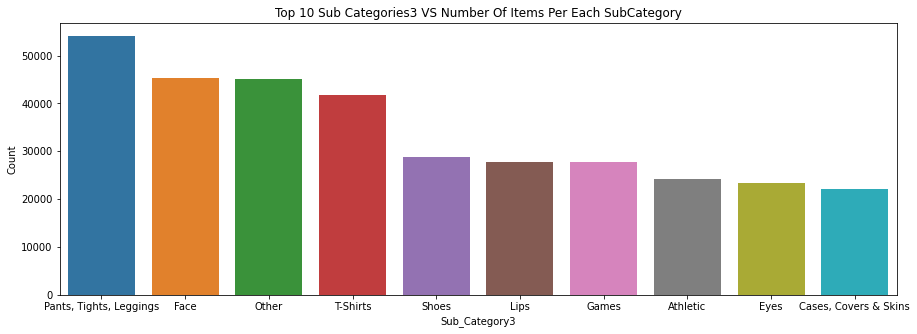

In [0]:
count=train_data['sub_category3'].value_counts()
print("Number Of Unique Category3: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category3')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories3 VS Number Of Items Per Each SubCategory")
plt.show()

In [ ]:
#Pants,Tights,Leggings ,Face and Other categories are the top three repeating things in subcategory level3.
#It is clear that the dataset contains products related to womens the most like cosmotics,
#dresses and some related accessories of womens.

Number of Unique Brands: 4674


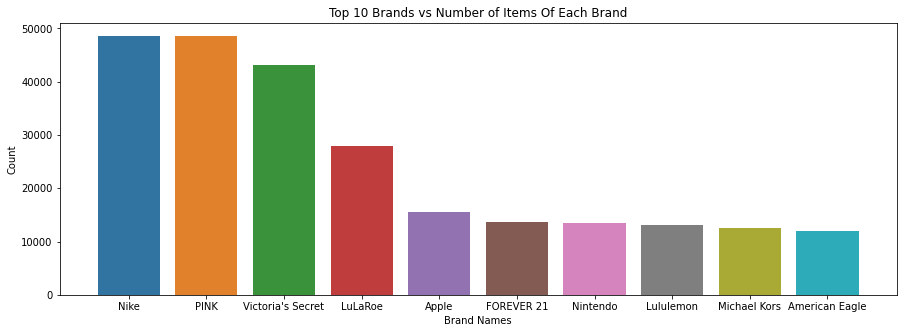

In [0]:
unique_brands=train_data['brand_name'].value_counts()
print("Number of Unique Brands: {}".format(len(unique_brands)))
plt.figure(figsize=(15,5))
sns.barplot(unique_brands.index[1:11],unique_brands[1:11])
plt.title('Top 10 Brands vs Number of Items Of Each Brand')
plt.xlabel('Brand Names')
plt.ylabel('Count')
plt.plot()
plt.show()

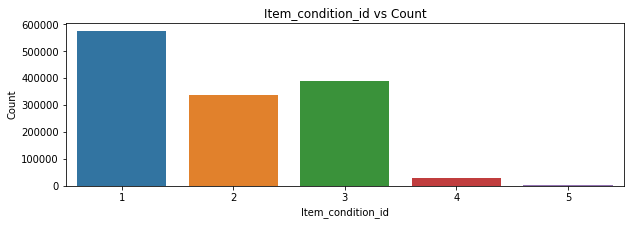

In [0]:
count=train_data['item_condition_id'].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(count.index[:10],count[:10])
plt.title('Item_condition_id vs Count')
plt.xlabel('Item_condition_id')
plt.ylabel('Count')
plt.show()

In [ ]:
# Item_condition_id with 1 as a id is the most repeating one in the products.
# Nearly 60 lakhs of products have condition_id 1.
#item_condition_id with 5 as a id is the least repeating one.

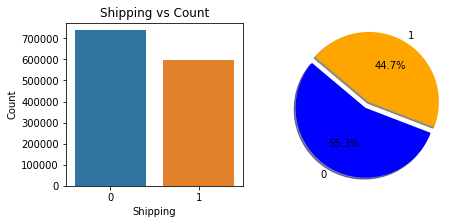

In [0]:
count=train_data['shipping'].value_counts()
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.barplot(count.index,count)
plt.xlabel('Shipping')
plt.ylabel('Count')
plt.title('Shipping vs Count')
plt.subplot(1,2,2)
labels = ['0','1']
sizes = count
colors = ['blue','orange']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [0]:
train_data['price'].describe()

count    1.333494e+06
mean     2.675457e+01
std      3.866316e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

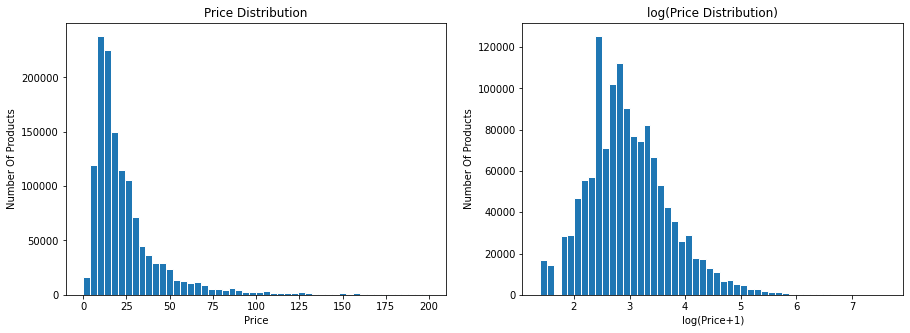

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(train_data['price'],bins=50,range=[0,200],edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel("Number Of Products")
plt.subplot(1,2,2)
log_price=[np.log(i+1) for i in train_data['price']]
plt.hist(np.log(train_data['price']+1),bins=50,edgecolor='white')
plt.title("log(Price Distribution)")
plt.xlabel("log(Price+1)")
plt.ylabel("Number Of Products")
plt.show()

In [ ]:
#In the left graph we can see a tailedness in the curve whose values are deprecating towards 0.
#Hence we take log(price+1) instead of price.

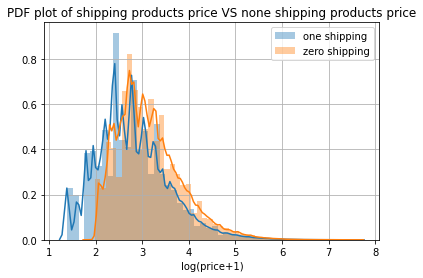

In [0]:
one_shipping=np.log(train_data.loc[train_data['shipping']==1,'price']+1)
zero_shipping=np.log(train_data.loc[train_data['shipping']==0,'price']+1)
sns.distplot(one_shipping,label='one shipping')
sns.distplot(zero_shipping,label='zero shipping')
plt.title('PDF plot of shipping products price VS none shipping products price')
plt.xlabel("log(price+1)")
plt.grid()
plt.legend()
plt.show()

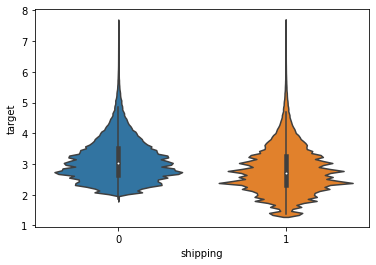

In [0]:
train_data['target']=np.log(train_data['price']+1)
sns.violinplot(x="shipping", y="target", data=train_data)
plt.show()

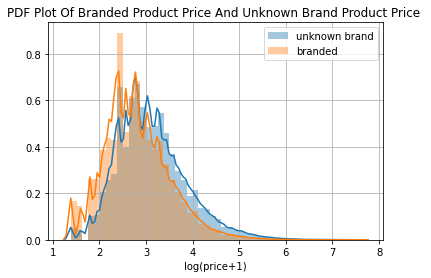

In [0]:
unknown_brand=np.log(train_data.loc[train_data['brand_name']!='Not known','price']+1)
brand=np.log(train_data.loc[train_data['brand_name']=='Not known','price']+1)
sns.distplot(unknown_brand,label='unknown brand')
sns.distplot(brand,label='branded')
plt.title('PDF Plot Of Branded Product Price And Unknown Brand Product Price ')
plt.xlabel('log(price+1)')
plt.grid()
plt.legend()
plt.show()

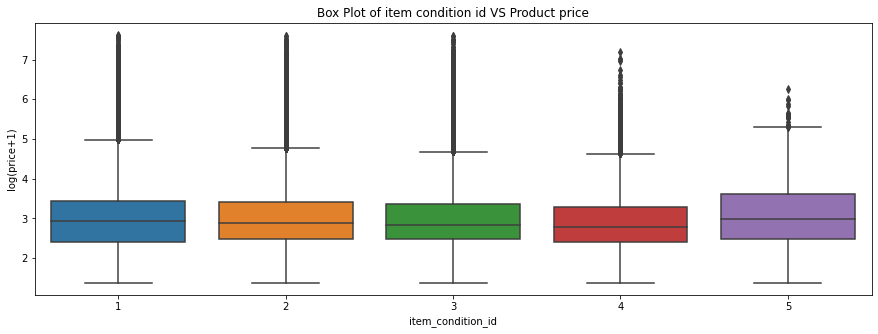

In [0]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_data['item_condition_id'],y=np.log(train_data['price']+1))
plt.title('Box Plot of item condition id VS Product price')
plt.ylabel('log(price+1)')
plt.show()

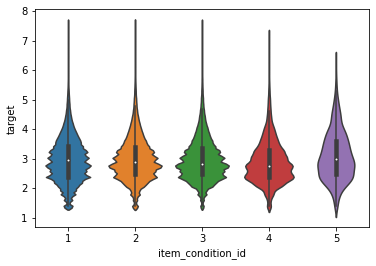

In [0]:
sns.violinplot(x='item_condition_id',y='target',data=train_data)
plt.show()

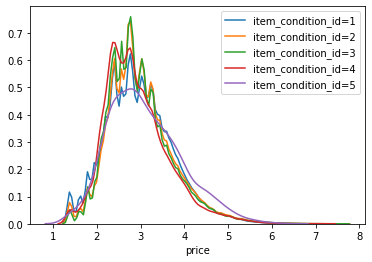

In [0]:
id1=np.log(train_data.loc[train_data['item_condition_id']==1,'price']+1)
id2=np.log(train_data.loc[train_data['item_condition_id']==2,'price']+1)
id3=np.log(train_data.loc[train_data['item_condition_id']==3,'price']+1)
id4=np.log(train_data.loc[train_data['item_condition_id']==4,'price']+1)
id5=np.log(train_data.loc[train_data['item_condition_id']==5,'price']+1)
sns.distplot(id1,hist=False,label='item_condition_id=1')
sns.distplot(id2,hist=False,label='item_condition_id=2')
sns.distplot(id3,hist=False,label='item_condition_id=3')
sns.distplot(id4,hist=False,label='item_condition_id=4')
sns.distplot(id5,hist=False,label='item_condition_id=5')
plt.show()

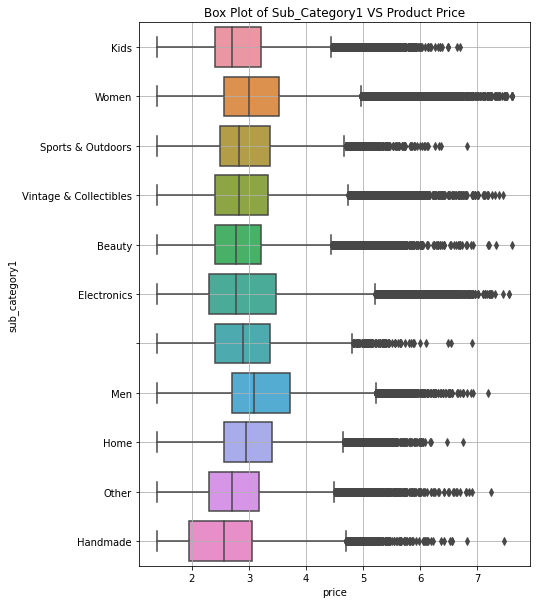

In [0]:
plt.figure(figsize=(7,10))
sns.boxplot(y=train_data['sub_category1'],x=np.log(train_data['price']+1))
plt.title('Box Plot of Sub_Category1 VS Product Price')
plt.grid()
plt.show()

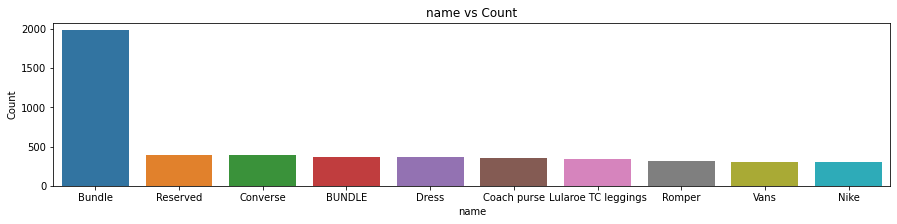

In [0]:
count=train_data['name'].value_counts()
plt.figure(figsize=(15,3))
sns.barplot(count.index[:10],count[:10])
plt.title('name vs Count')
plt.xlabel('name')
plt.ylabel('Count')
plt.show()

In [0]:
stopwords=set(stopwords.words('english'))

In [0]:
def stopwords_count(data):
  """this function counts the number of stopwords in each of the item_description"""
  count_stopwords=[]
  for i in tqdm(data['item_description']):
    count=0
    for j in i.split(' '):
      if j in stopwords: count+=1  #finding if the word is present in the nltk stopwords or not
    count_stopwords.append(count)
  return count_stopwords

In [0]:
train_data['count_stopwords']=stopwords_count(train_data)
cv_data['count_stopwords']=stopwords_count(cv_data)
test_data['count_stopwords']=stopwords_count(test_data)

100%|██████████| 3460725/3460725 [00:12<00:00, 280879.52it/s]


In [0]:
train_data['count_stopwords'].describe()

count    1.333494e+06
mean     5.982603e+00
std      9.063958e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      1.180000e+02
Name: count_stopwords, dtype: float64

Text Preprocessing:

In [0]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    """this function removies shorthands for the textual data..."""
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
def text_preprocessing(data):
  """this function performs preprocessing the item_description """
  preprocessed_total = []
  for sentance in tqdm(data['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  #removing stop words
    preprocessed_total.append(sent.lower().strip())
  return preprocessed_total

In [0]:
train_data['item_description']=text_preprocessing(train_data)
cv_data['item_description']=text_preprocessing(cv_data)
test_data['item_description']=text_preprocessing(test_data)

100%|██████████| 3460725/3460725 [01:18<00:00, 44182.04it/s]


In [0]:
word_count={}
for sentence in tqdm(train_data['item_description']):
    for word in sentence.split(' '):
        if len(word)>=3:  #taking words which are of length>=3
            if word not in word_count:
                word_count[word]=1  #if word not present in dict assigning it to 1
            else:
                word_count[word]+=1 #else incrementing it by 1

100%|██████████| 1333494/1333494 [00:11<00:00, 117732.34it/s]


In [0]:
n_print=25
word_counter = collections.Counter(word_count)
words=[]
counter=[]
for word, count in word_counter.most_common(n_print):
    words.append(word)
    counter.append(count)

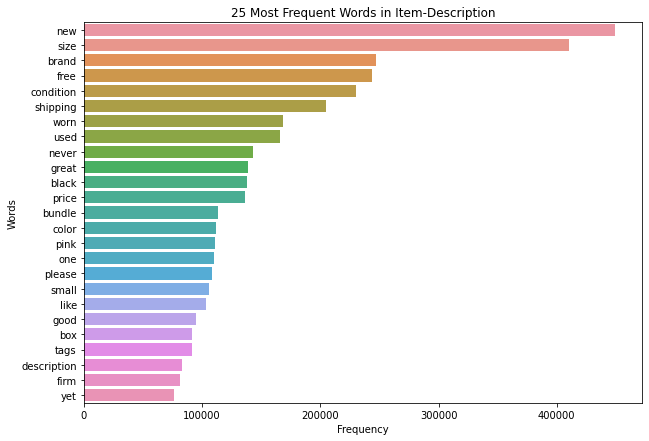

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(counter,words)
plt.title("25 Most Frequent Words in Item-Description")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [0]:
def description_length(data):
  """this function finds the length of the description basing on spaces in the statement"""
  description_length=[]
  for i in data['item_description']:
    description_length.append(len(i.split(' '))) #splitting statement using spaces and finding length of it
  return description_length

In [0]:
print("processing item_description in train_data...")
train_data['description_length']=description_length(train_data)
cv_data['description_length']=description_length(cv_data)
print(train_data.iloc[100]['item_description'],train_data.iloc[100]['description_length'])
print("="*100)
print("processing item_description in test_data...")
test_data['description_length']=description_length(test_data)
print(test_data.iloc[100]['item_description'],test_data.iloc[100]['description_length'])

processing item_description in train_data...
Two Size 24 cowgirl tuff new jeans 7
processing item_description in test_data...
Abercrombie boys khaki cargo shorts in a size 8. These shorts have an inside drawstring waist and are somewhat heavy. 20


In [0]:
train_data['description_length'].describe()

count    1.333494e+06
mean     2.570475e+01
std      3.041483e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      3.100000e+01
max      2.450000e+02
Name: description_length, dtype: float64

In [0]:
def branded(data):
   """this function assigns a value 1 if a product has brand_name else 0"""
   is_branded=[]
   for i in data['brand_name']:
      if i=='Not known': is_branded.append(0) #if it is a Nan value i.e.. unknown brand make it as 0.
      else: is_branded.append(1)
   return is_branded
train_data['is_branded']=branded(train_data)
cv_data['is_branded']=branded(cv_data)
test_data['is_branded']=branded(test_data)

In [0]:
def sentiment_analysis(data):
   """this function performs sentiment score analysis of each datapoint"""
   sentiment_score = SentimentIntensityAnalyzer()
   sentiment = []
   for sentence in tqdm(data):
       sentiment.append(sentiment_score.polarity_scores(sentence))
   return sentiment

In [0]:
training_sentiment_score=sentiment_analysis(train_data['item_description']) 
cv_sentiment_score=sentiment_analysis(cv_data['item_description'])
testing_sentiment_score=sentiment_analysis(test_data['item_description'])

100%|██████████| 3460725/3460725 [10:54<00:00, 5291.50it/s]


In [0]:
def splitting_sentiment(sentiment_score):
  """this function splits sentiment analysis score into four further features ie positive,negative,compound and neutral"""
  positive=[]
  negative=[]
  neutral=[]
  compound=[]
  for i in sentiment_score:
    positive.append(i['pos'])
    negative.append(i['neg'])
    neutral.append(i['neu'])
    compound.append(i['compound'])
  return positive,negative,neutral,compound

In [0]:
print("Training Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(training_sentiment_score)
train_data['positive']=pos
train_data['negative']=neg
train_data['neutral']=neu
train_data['compound']=comp
print(train_data.iloc[50]['item_description'])
print(training_sentiment_score[50])

Training Data Sentiment Analysis: 
american flag bodysuit two buttons bottom size large fits like medium brand tobi
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}


In [0]:
print("CV Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(cv_sentiment_score)
cv_data['positive']=pos
cv_data['negative']=neg
cv_data['neutral']=neu
cv_data['compound']=comp
print(cv_data.iloc[50]['item_description'])
print(cv_sentiment_score[50])

CV Data Sentiment Analysis: 
brand new
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
print("Testing Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(testing_sentiment_score)
test_data['positive']=pos
test_data['negative']=neg
test_data['neutral']=neu
test_data['compound']=comp
print(test_data.iloc[50]['item_description'])
print(testing_sentiment_score[50])

Testing Data Sentiment Analysis: 
pok mon card
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
train_data['target']=np.log(np.array(train_data['price'].values)+1)
cv_data['target']=np.log(np.array(cv_data['price'].values)+1)
#train_data.drop(['train_id','category_name'],axis=1,inplace=True)
#cv_data.drop(['train_id','category_name'],axis=1,inplace=True)

In [0]:
#test_data=test_data.drop(['test_id','category_name'],axis=1)
#test_data.head(1)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer=CountVectorizer().fit(train_data['sub_category1'])                     #fitting
bow_cat1_train=countvectorizer.transform(train_data['sub_category1'])
bow_cat1_cv=countvectorizer.transform(cv_data['sub_category1'])
bow_cat1_test=countvectorizer.transform(test_data['sub_category1'])
print("After Vectorization of sub category1 feature: ")
print(bow_cat1_train.shape)
print(bow_cat1_cv.shape)
print(bow_cat1_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names())
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['sub_category2'])   #fitting
bow_cat2_train=countvectorizer.transform(train_data['sub_category2'])
bow_cat2_cv=countvectorizer.transform(cv_data['sub_category2'])
bow_cat2_test=countvectorizer.transform(test_data['sub_category2'])
print("After Vectorization of sub category2 feature: ")
print(bow_cat2_train.shape)
print(bow_cat2_cv.shape)
print(bow_cat2_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['sub_category3'])   #fitting
bow_cat3_train=countvectorizer.transform(train_data['sub_category3'])
bow_cat3_cv=countvectorizer.transform(cv_data['sub_category3'])
bow_cat3_test=countvectorizer.transform(test_data['sub_category3'])
print("After Vectorization of sub category3 feature: ")
print(bow_cat3_train.shape)
print(bow_cat3_cv.shape)
print(bow_cat3_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['brand_name'])  #fitting
bow_brand_train=countvectorizer.transform(train_data['brand_name'])
bow_brand_cv=countvectorizer.transform(cv_data['brand_name'])
bow_brand_test=countvectorizer.transform(test_data['brand_name'])
print("After Vectorization of brand_name feature: ")
print(bow_brand_train.shape)
print(bow_brand_cv.shape)
print(bow_brand_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)

After Vectorization of sub category1 feature: 
(1333494, 12)
(148167, 12)
(3460725, 12)
Some Features are: 
['beauty', 'collectibles', 'electronics', 'handmade', 'home', 'kids', 'men', 'other', 'outdoors', 'sports', 'vintage', 'women']
After Vectorization of sub category2 feature: 
(1333494, 141)
(148167, 141)
(3460725, 141)
Some Features are: 
['feeding', 'footwear', 'fragrance', 'furniture', 'games', 'gear', 'geekery', 'girls', 'glass', 'golf', 'goods', 'gps', 'hair', 'handbags', 'health', 'holidays', 'home', 'hoodies', 'housewares', 'instruments', 'items', 'jackets', 'jeans', 'jewelry', 'kids']
After Vectorization of sub category3 feature: 
(1333494, 963)
(148167, 963)
(3460725, 963)
Some Features are: 
['basketball', 'baskets', 'bass', 'bath', 'bathing', 'bathroom', 'batteries', 'beach', 'bead', 'beading', 'beads', 'bear', 'bears', 'bed', 'bedding', 'bedroom', 'beds', 'bedspreads', 'beer', 'belt', 'belts', 'beverage', 'bibles', 'bibs', 'bicycle']
After Vectorization of brand_name f

In [0]:
countvectorizer=CountVectorizer(min_df=10).fit(train_data['name'])  #fitting
bow_name_train=countvectorizer.transform(train_data['name'])
bow_name_cv=countvectorizer.transform(cv_data['name'])
bow_name_test=countvectorizer.transform(test_data['name'])
print("After Vectorization of brand_name feature: ")
print(bow_name_train.shape)
print(bow_name_cv.shape)
print(bow_name_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[10000:10025])

After Vectorization of brand_name feature: 
(1333494, 16794)
(148167, 16794)
(3460725, 16794)
Some Features are: 
['mojito', 'mojo', 'molang', 'mold', 'molds', 'moleskine', 'mollie', 'molly', 'moltres', 'moly', 'mom', 'moment', 'moments', 'momlife', 'momma', 'mommy', 'momo', 'momof3', 'moms', 'mon', 'mona', 'monaco', 'monarch', 'monat', 'moncler']


In [0]:
tfidfvectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000).fit(train_data['item_description']) #fitting
tfidf_description_train=tfidfvectorizer.transform(train_data['item_description'])
tfidf_description_cv=tfidfvectorizer.transform(cv_data['item_description'])
tfidf_description_test=tfidfvectorizer.transform(test_data['item_description'])
print("After Vectorization of item description feature: ")
print(tfidf_description_train.shape)
print(tfidf_description_cv.shape)
print(tfidf_description_test.shape)
print("Some Features are: ")
print(tfidfvectorizer.get_feature_names()[3025:3050])  #getting 25 random features.

After Vectorization of item description feature: 
(1333494, 5000)
(148167, 5000)
(3460725, 5000)
Some Features are: 
['packing', 'packs', 'pacsun', 'pad', 'padded', 'padding', 'pads', 'page', 'pages', 'paid', 'paid product', 'paid rm', 'pain', 'paint', 'painted', 'pair', 'pair rm', 'paired', 'pairs', 'pairs rm', 'paisley', 'pajama', 'pajamas', 'pale', 'pale pink']


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(np.array(train_data['positive']).reshape(-1,1))   #fitting
positive_train = scaler.transform(np.array(train_data['positive']).reshape(-1,1))
positive_cv = scaler.transform(np.array(cv_data['positive']).reshape(-1,1))
positive_test = scaler.transform(np.array(test_data['positive']).reshape(-1,1))
print(positive_train[50:55].reshape(1,-1)[0])    #printing 5 random postive sentiment scores 
print("After Preprocessing of positive sentiment score:")
print(positive_train.shape)
print(positive_cv.shape)
print(positive_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['negative']).reshape(-1,1))  #fitting
negative_train=scaler.transform(np.array(train_data['negative']).reshape(-1,1))
negative_cv=scaler.transform(np.array(cv_data['negative']).reshape(-1,1))
negative_test=scaler.transform(np.array(test_data['negative']).reshape(-1,1))
print(negative_train[25:30].reshape(1,-1)[0])    #printing 5 random negative sentiment score
print("After Preprocessing of negative sentiment score:")
print(negative_train.shape)
print(negative_cv.shape)
print(negative_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['neutral']).reshape(-1,1))   #fitting
neutral_train=scaler.transform(np.array(train_data['neutral']).reshape(-1,1))
neutral_cv=scaler.transform(np.array(cv_data['neutral']).reshape(-1,1))
neutral_test=scaler.transform(np.array(test_data['neutral']).reshape(-1,1))
print(neutral_train[5:10].reshape(1,-1)[0])     #printing 5 random neutral sentiment score
print("After Preprocessing of neutral sentiment score:")
print(neutral_train.shape)
print(neutral_cv.shape)
print(neutral_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['compound']).reshape(-1,1))  #fitting
compound_train=scaler.transform(np.array(train_data['compound']).reshape(-1,1))
compound_cv=scaler.transform(np.array(cv_data['compound']).reshape(-1,1))
compound_test=scaler.transform(np.array(test_data['compound']).reshape(-1,1))
print(compound_train[35:40].reshape(1,-1)[0])   #printing 5 random compound sentiment score
print("After Preprocessing of compound sentiment score:")
print(compound_train.shape)
print(compound_cv.shape)
print(compound_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['description_length']).reshape(-1,1))  #fitting
length_train=scaler.transform(np.array(train_data['description_length']).reshape(-1,1))
length_cv=scaler.transform(np.array(cv_data['description_length']).reshape(-1,1))
length_test=scaler.transform(np.array(test_data['description_length']).reshape(-1,1))
print(length_train[1:5].reshape(1,-1)[0])       #printing 5 random description lengths
print("After Preprocessing of description length:")
print(length_train.shape)
print(length_cv.shape)
print(length_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['count_stopwords']).reshape(-1,1))   #fitting
stopword_train=scaler.transform(np.array(train_data['count_stopwords']).reshape(-1,1))
stopword_cv=scaler.transform(np.array(cv_data['count_stopwords']).reshape(-1,1))
stopword_test=scaler.transform(np.array(test_data['count_stopwords']).reshape(-1,1))
print(stopword_train[15:20].reshape(1,-1)[0])   #printing 5 random stopwords count
print("After Preprocessing of count_stopwords feature:")
print(stopword_train.shape)
print(stopword_cv.shape)
print(stopword_test.shape)

[-0.15288459  2.54943072 -1.02329326  1.55756967 -0.64881511]
After Preprocessing of positive sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.41824262  1.7012617   1.92436742 -0.20629219 -0.41824262]
After Preprocessing of negative sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[ 1.13290915 -0.30926719  1.13290915 -0.87011354 -0.53077793]
After Preprocessing of neutral sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[ 0.10367151 -0.28067616  1.48874009  1.08718659  0.8822349 ]
After Preprocessing of compound sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.1218073  -0.64786662 -0.61498792 -0.38483696]
After Preprocessing of description length:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.66004331  0.11224649  1.98780745  0.11224649 -0.21873485]
After Preprocessing of count_stopwords feature:
(1333494, 1)
(148167, 1)
(3460725, 1)


In [0]:
#https://stackoverflow.com/questions/36285155/pandas-get-dummies

features_train = csr_matrix(pd.get_dummies(train_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_cv = csr_matrix(pd.get_dummies(cv_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_test = csr_matrix(pd.get_dummies(test_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
print(features_train.shape)
print(features_cv.shape)
print(features_test.shape)

(1333494, 2)
(148167, 2)
(3460725, 2)


In [0]:
#https://stackoverflow.com/questions/43018711/about-numpys-concatenate-hstack-vstack-functions
from scipy.sparse import hstack
X_train=hstack((bow_cat1_train,bow_cat2_train,bow_cat3_train,bow_brand_train,bow_name_train,tfidf_description_train,positive_train,negative_train,neutral_train,compound_train,features_train,length_train,stopword_train)).tocsr()
X_cv=hstack((bow_cat1_cv,bow_cat2_cv,bow_cat3_cv,bow_brand_cv,bow_name_cv,tfidf_description_cv,positive_cv,negative_cv,neutral_cv,compound_cv,features_cv,length_cv,stopword_cv)).tocsr()
X_test=hstack((bow_cat1_test,bow_cat2_test,bow_cat3_test,bow_brand_test,bow_name_test,tfidf_description_test,positive_test,negative_test,neutral_test,compound_test,features_test,length_test,stopword_test)).tocsr()
print("Shape of train data: ",X_train.shape) #train
print("Shape of cv data: ",X_cv.shape)   #cv
print("Shape of test data: ",X_test.shape)   #test

Shape of train data:  (1333494, 27838)
Shape of cv data:  (148167, 27838)
Shape of test data:  (3460725, 27838)


In [0]:
from sklearn.linear_model import LinearRegression
linearregression=LinearRegression(normalize=True)
linearregression.fit(X_train,train_data['target'])  #fitting
ytrain_predict=linearregression.predict(X_train)
ycv_predict=linearregression.predict(X_cv)
train_error=np.sqrt(mean_squared_error(train_data['target'],ytrain_predict))
cv_error=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("With Linear Regression RMSLE on train is {} RMSLE on cv is {}".format(train_error,cv_error))

With Linear Regression RMSLE on train is 0.46090123650225584 RMSLE on cv is 0.4693486598717122


In [0]:
ycv_linear=linearregression.predict(X_cv)
ytest_linear=linearregression.predict(X_test)

In [0]:
from sklearn.linear_model import Lasso
params={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]}
lasso=Lasso(fit_intercept=False)
gridsearchcv_lasso=GridSearchCV(lasso,param_grid=params,n_jobs=-1,cv=3,verbose=1,return_train_score=True)
gridsearchcv_lasso.fit(X_train,train_data['target'])  #fitting

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 23.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Lasso Regression: 
train_error:  [0.46424316736234644, 0.4791803637812362, 0.524667226421087, 0.602598236163241, 0.6849090885571419, 0.7592210426935225, 1.5530177567469883]
cv_error:  [0.46992394285359196, 0.47952353838212114, 0.5220675071491777, 0.601640635113616, 0.6850337911742654, 0.7604648652666045, 1.5518486088341135]




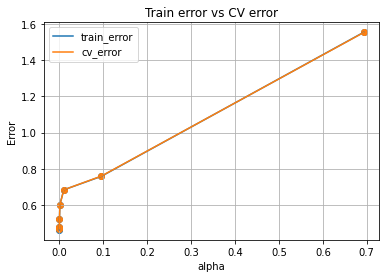

In [0]:
alpha=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
alpha=[math.log(i+1) for i in alpha]
values=pd.DataFrame(gridsearchcv_lasso.cv_results_).groupby(['param_alpha']).min().unstack()
train_error=values['mean_train_score']
cv_error=values['mean_test_score']
print("Lasso Regression: ")
print("train_error: ",train_error)
print("cv_error: ",cv_error)
print("\n")
plt.plot(alpha,train_error,label="train_error")
plt.scatter(alpha,train_error)
plt.plot(alpha,cv_error,label='cv_error')
plt.scatter(alpha,cv_error)
plt.title("Train error vs CV error")
plt.xlabel("alpha")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

In [0]:
gridsearchcv_lasso.best_params_

{'alpha': 1e-06}

In [0]:
lasso = Lasso(alpha=1e-06,fit_intercept=False)
print("Model is fitting!!!")
lasso.fit(X_train, train_data['target'])
ytrain_predict=lasso.predict(X_train)
ycv_predict=lasso.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("Lasso Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1e-06,train_,cv_))

Model is fitting!!!
Lasso Regression with alpha = 1e-06 RMSLE on train is 0.46424316736234644 RMSLE on cv is 0.46992394285359196


In [0]:
ycv_lasso=lasso.predict(X_cv)
ytest_lasso=lasso.predict(X_test)

In [0]:
from sklearn.linear_model import Ridge
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100],'solver':['cholesky','lsqr']}
ridge=Ridge(fit_intercept=False)
gridsearchcv_ridge=GridSearchCV(ridge,param_grid=params,njobs=-1,cv=3,verbose=1,return_train_score=True)
gridsearchcv_ridge.fit(X_train,train_data['target'])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 4 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 22.0min finished 
GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
                             iid='deprecated', n_jobs=None,
                             param_grid={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
                                         'solver': ['cholesky', 'lsqr']},
                             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
                             scoring=None, verbose=1)


In [0]:
def return_result(gridsearchcv,rate):
    values=pd.DataFrame(gridsearchcv.cv_results_).groupby(['param_alpha','param_learning_rate']).min().unstack()
    train_error=[]
    cv_error=[]
    for i in range(val.shape[0]):
       train_error.append(values.iloc[i]['mean_train_score'==rate])
       cv_error.append(values.iloc[i]['mean_test_score'==rate])
    print("with learning_rate: {}".format(rate))
    print("train_error: ",train_error)
    print("cv_error: ",cv_error)
    print("\n")
    return train_error,cv_error

with learning rate: cholesky
train_error:  [0.46123448606764766, 0.4612344861744916, 0.4612344948585147, 0.4612349136577718, 0.4612473569407215, 0.4614697607065464, 0.46373220171730173, 0.4770768200604874]
cv_error:  [0.4696215399931567, 0.4696209351546391, 0.46961505451113716, 0.46956801904299456, 0.4693693783323686, 0.4688873665981245, 0.46679662525041055, 0.4798964886244808]


with learning rate: lsqr
train_error:  [0.47991845817477785, 0.4799184581746841, 0.4799184581742052, 0.47991845821517004, 0.4799184631972253, 0.47991896731873046, 0.47996663778082416, 0.48746082188140344]
cv_error:  [0.4804947057712104, 0.48049470476861333, 0.48049469474313433, 0.4804945945374393, 0.480493597387021, 0.4804841134999115, 0.48043514146269295, 0.4866231865954394]




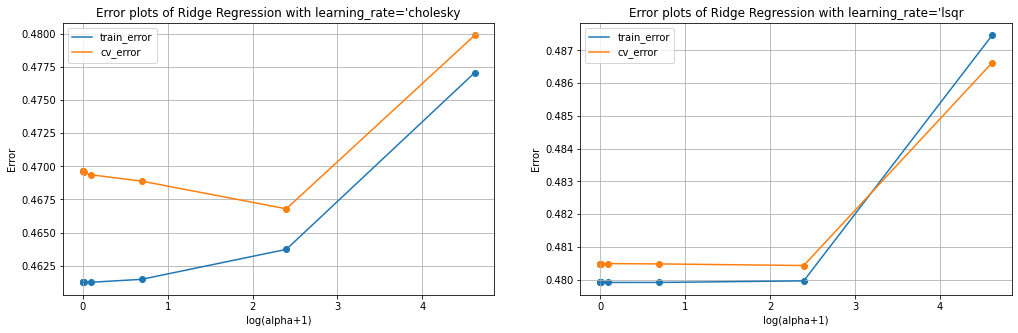

In [0]:
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100]
alpha=[math.log(i+1) for i in alpha]
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
train_error_cholesky,cv_error_cholesky=return_result(gridsearchcv_ridge,'cholesky')
plt.plot(alpha,train_error_cholesky,label='train_error')
plt.scatter(alpha,train_error_cholesky)
plt.plot(alpha,cv_error_cholesky,label='cv_error')
plt.xlabel('log(alpha+1)')
plt.ylabel('Error')
plt.scatter(alpha,cv_error_cholesky)
plt.title("Error plots of Ridge Regression with learning_rate='cholesky")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
train_error_lsqr,cv_error_lsqr=return_result(gridsearchcv_ridge,'lsqr')
plt.plot(alpha,train_error_lsqr,label='train_error')
plt.scatter(alpha,train_error_lsqr)
plt.plot(alpha,cv_error_lsqr,label='cv_error')
plt.scatter(alpha,cv_error_lsqr)
plt.title("Error plots of Ridge Regression with learning_rate='lsqr")
plt.xlabel("log(alpha+1)")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

**Observations:**


    *   We trained the model for two learning rates. The error plot of learning rate with **cholesky** on the left and learning rate with **lsqr** on the right side of the plot.**
    *   learning rate with 'cholesky' is giving low error metric compared to 'lsqr' learning rate. But the train and cv error plots in 'lsqr' are more coinciding than the 'cholesky' plot.
    *   Since In the case of this case study error metric is important 'cholesky' be the best learning rate



In [0]:
gridsearchcv_ridge.best_params_

{'alpha': 10, 'solver': 'cholesky'}

**Description:**


    *   Hyper parameter plays an important role in model predictions because using hyper parameter tuning we can protest our model from getting underfit and overfit
    *   From the Above Error plot we need to pick alpha value(hyper parameter) in such a way that both train and test error are low.
    *   With alpha=1 both the test error and train error are closer and are lesser than alpha>1. 
    *   With alpha=0.0001 the train error is low but test error is much higher than train error.
    *   Hence we will choose alpha=10 as the best hyperparameter in this case.



Ridge Regression with Best Hyper Parameters:

In [0]:
ridge = Ridge(alpha=10,solver='cholesky',fit_intercept=False)
print("Model is fitting!!!")
ridge.fit(X_train, train_data['target'])
ytrain_cholesky_predict=ridge.predict(X_train)
ycv_cholesky_predict=ridge.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_cholesky_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_cholesky_predict))
print("Ridge Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1,train_,cv_))

Model is fitting!!!
Ridge Regression with alpha = 1 RMSLE on train is 0.46373220171730173 RMSLE on cv is 0.46679662525041055


In [0]:
ycv_ridge=ridge.predict(X_cv)
ytest_ridge=ridge.predict(X_test)

In [0]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss='squared_loss', max_iter=200, penalty='l2',fit_intercept=False,l1_ratio=0.6)
params={'alpha':[0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000],'learning_rate':['invscaling','adaptive']}
gridsearchcv=GridSearchCV(sgd,param_grid=params,return_train_score=True)
gridsearchcv.fit(X_train,train_data['target'])   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=False,
                                    l1_ratio=0.6, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=200,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1],
                         'learning_rate': ['invscaling', 'adaptive']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

with learning rate: adaptive
train_error:  [0.46258151544524667, 0.46258245482048427, 0.46483649432062113, 0.48016147635359874, 0.5205752819395818, 0.5917970847895279, 0.7255153319689673, 0.4625804956434685, 1.0049017176141175]
cv_error:  [0.4688558627790037, 0.4688619000720196, 0.4692822488228858, 0.4805051420009014, 0.5189131079049061, 0.5906065711592959, 0.7249848311406205, 0.4688377923404662, 1.0050139402008162]


with learning rate: invscaling
train_error:  [0.4893846551558464, 0.48954774037696247, 0.48973125711047344, 0.4929607195199796, 0.5213178486837378, 0.5926636632267787, 0.7266517284822288, 0.4894245397695104]
cv_error:  [0.4884044531500078, 0.48849486404927006, 0.48871279763132197, 0.4917611240507121, 0.5195797694682748, 0.5915081361184699, 0.7261611151478855, 0.48838273951167877]




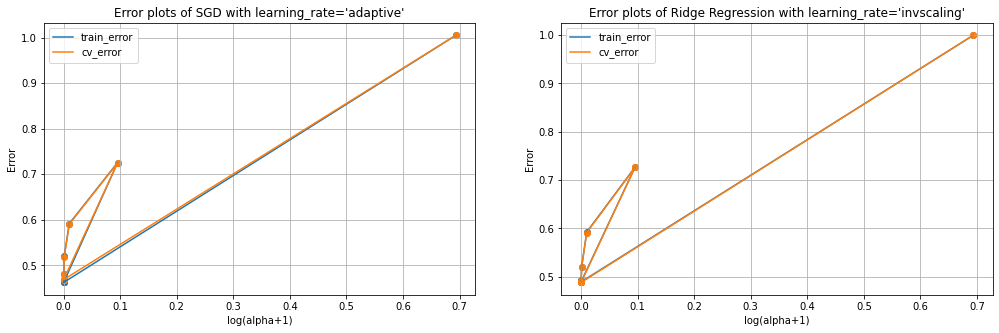

In [0]:
alpha=[0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1]
alpha=[math.log(i+1) for i in alpha]
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
train_error_adaptive,cv_error_adaptive=return_result(gridsearchcv,'adaptive')
plt.plot(alpha,train_error_adaptive,label='train_error')
plt.scatter(alpha,train_error_adaptive)
plt.plot(alpha,cv_error_adaptive,label='cv_error')
plt.xlabel('log(alpha+1)')
plt.ylabel('Error')
plt.scatter(alpha,cv_error_adaptive)
plt.title("Error plots of SGD with learning_rate='adaptive'")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
train_error_inv,cv_error_inv=return_result(gridsearchcv,'invscaling')
plt.plot(alpha,train_error_inv,label='train_error')
plt.scatter(alpha,train_error_inv)
plt.plot(alpha,cv_error_inv,label='cv_error')
plt.scatter(alpha,cv_error_inv)
plt.title("Error plots of SGD with learning_rate='invscaling'")
plt.xlabel("log(alpha+1)")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In [0]:
gridsearchcv.best_params_

{'alpha': 1e-09, 'learning_rate': 'adaptive}


Schocatsic gradient regressor with best hyper parameters:

In [0]:
sgd = SGDRegressor(alpha=1e-09,loss='squared_loss',learning_rate='adaptive', max_iter=200, penalty='l2',fit_intercept=False,l1_ratio=0.6)
sgd.fit(X_train, train_data['target'])
ytrain_predict=sgd.predict(X_train)
ycv_predict=sgd.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("SGD Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1e-09,train_,cv_))

SGD Regression with alpha = 1e-09 RMSLE on train is 0.462581674189578 RMSLE on cv is 0.46885382806201875


In [0]:
#pip install lightgbm

In [0]:
params={'learning_rate':[0.1,0.3,0.5,0.6],'max_depth':[5,8,12,15],'n_estimators':[50,100,150,200],'num_leaves':[15,25,50,75],'boosting_type':['gbdt']}
lgbm_params={'sub_sample':0.9,'colsample_bytree':0.8,'min_child_samples':50,'objective':'regression'}
lgbm_regressor=LGBMRegressor(**lgbm_params)
gridsearchcv=GridSearchCV(lgbm_regressor,param_grid=params,n_jobs=-1,cv=3,verbose=1)
gridsearchcv.fit(X_train,train_data['target'],early_stopping_rounds=100,verbose=True)

Fitting 3 folds for each of 16 candidates, totalling 576 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 115.3min
[Parallel(n_jobs=-1)]: Done 576 taks       | elapsed: 126min


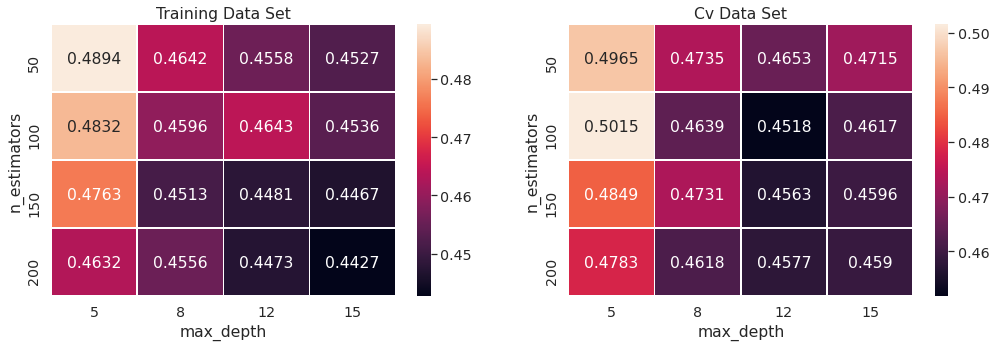

In [0]:
fig,ax=plt.subplots(1,2,figsize=(17,5)) 
sns.set(font_scale=1.3) 
data=pd.DataFrame(gridsearchcv.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_train_score','mean_test_score']] 
sns.heatmap(data.mean_train_score,annot=True,linewidths=0.7,fmt='.4g',ax=ax[0],square=False,yticklabels=['50','100','150','200'])
ax[0].set_title("Training Data Set") 
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('n_estimators')
sns.heatmap(data.mean_test_score,annot=True,linewidths=.7,fmt='.4g',ax=ax[1],square=False,yticklabels=['50','100','150','200'])
ax[1].set_title("Cv Data Set")
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel("n_estimators")
plt.show()

In [0]:
gridsearchcv.best_params_

{'learning_rate': 0.1, 'max_depth: 15, 'n_estimators: 200', 'num_leaves: 75', 'boosting_type': 'gbdt'}


In [0]:
from lightgbm import LGBMRegressor
params={'learning_rate':[0.1],'max_depth':[15],'n_estimators':[200],'num_leaves':[75],'boosting_type':['gbdt']}
lgbm_regressor=LGBMRegressor(learning_rate=0.5,max_depth=8,n_estimators=500,num_leaves=80,boosting_type='gbdt',sub_sample=0.9,colsample_bytree=0.8,min_child_samples=50)
lgbm_regressor.fit(X_train,train_data['target'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.5, max_depth=8,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=80, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_sample=0.9, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [0]:
ytrain_predict=lgbm_regressor.predict(X_train)
ycv_predict=lgbm_regressor.predict(X_cv)
training = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cving=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("RMSLE of train is {} RMSLE of test is {}".format(training,cving))

RMSLE of train is 0.44273270471579435 RMSLE of test is 0.45903311631135346


In [0]:
ycv_lgbm=lgbm_regressor.predict(X_cv)
ytest_lgbm=lgbm_regressor.predict(X_test)

In [0]:
Y_final=(ycv_lgbm*0.6+ycv_lasso*0.2+ycv_ridge*0.1+ycv_linear*0.1)
ycv_final=Y_final
print(np.sqrt(mean_squared_error(cv_data['target'],ycv_final)))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

0.44872398005672004


In [0]:
Y_test=(ytest_lgbm*0.6+ytest_lasso*0.2+ytest_ridge*0.1+ytest_linear*0.1)

In [0]:
mercari_prediction_cv=pd.DataFrame(np.exp(Y_final)+1,columns=['y_final'])
mercari_prediction_cv['ycv_lgbm']=np.exp(ycv_lgbm)+1
mercari_prediction_cv['ycv_linear']=np.exp(ycv_linear)+1
mercari_prediction_cv['ycv_ridge']=np.exp(ycv_ridge)+1

In [0]:
mercari_prediction_test=pd.DataFrame(np.exp(Y_test)+1,columns=['y_test'])
mercari_prediction_test['ytest_lgbm']=np.exp(ytest_lgbm)+1
mercari_prediction_test['ytest_linear']=np.exp(ytest_linear)+1
mercari_prediction_test['ytest_ridge']=np.exp(ytest_ridge)+1

In [0]:
mercari_prediction_cv.to_csv("/content/mercari_predictioncv.csv")

In [0]:
mercari_prediction_test.to_csv("/content/mercari_predictiontest.csv")

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam


Using TensorFlow backend.


In [0]:
train=pd.read_csv("/content/drive/My Drive/mercari_train.csv")
test=pd.read_csv("/content/drive/My Drive/mercari_test.csv")
train,val=train_test_split(train,test_size=0.1,random_state=42)

In [0]:
print(train.columns)
print(test.columns)
print(train.shape, val.shape)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')
(1333494, 8) (148167, 8)


In [0]:
import math
def handle_data(data):
  """this function handles Nan values in datasets as well as for a given data point."""
  if type(data)==type(pd.DataFrame()):   #checking if it is a dataframe or not
    data['category_name'].fillna(value='',inplace=True)
    data['brand_name'].fillna(value='',inplace=True)
    data['item_description'].fillna(value='',inplace=True)
    data['total_text']=data['name']+' '+data['category_name']+data['brand_name']+' '+data['item_description']
    data['total_name']=data['name']+' '+data['brand_name']
    data['item_condition_id']=(data['item_condition_id']-1)/4
    if 'price' in data.columns:
      return data[['total_text','total_name','item_condition_id','shipping','price']]
    else:
      return data[['total_text','total_name','item_condition_id','shipping']]

  else:      #if the given data is a data point
    if type(data['category_name'])==type(float()):  #checking for nan values in category_name
      data['category_name']=''
    if type(data['brand_name'])==type(float()):     #checking for nan values in brand_name
      data['brand_name']=''
    if type(data['item_description'])==type(float()):  #checking for nan values in item_description
      data['item_description']=''
    data['total_text']=data['name']+' '+data['category_name']+data['brand_name']+' '+data['item_description']
    data['total_name']=data['name']+' '+data['brand_name']
    data['item_condition_id']=(data['item_condition_id']-1)/4
    if 'price' in dict(data).keys():  #if price exits we will return it
      return data[['total_text','total_name','item_condition_id','shipping','price']]
    else:
      return data[['total_text','total_name','item_condition_id','shipping']]
    return False

In [0]:
train_=handle_data(train)
val_=handle_data(val)
test=handle_data(test)

In [0]:
train_["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train_["target"] = target_scaler.fit_transform(train_.target.values.reshape(-1,1))

In [0]:
vectorizer_name=TfidfVectorizer(max_features=100000,token_pattern='\w+',ngram_range=(1,2))
bow_name_train=vectorizer_name.fit_transform(train_['total_name'])
bow_name_val=vectorizer_name.transform(val_['total_name'])
bow_name_test=vectorizer_name.transform(test_['total_name'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_text=TfidfVectorizer(max_features=100000,token_pattern='\w+',ngram_range=(1,2))
bow_text_train=vectorizer_text.fit_transform(train_['total_text'])
bow_text_val=vectorizer_text.transform(val_['total_text'])
bow_text_test=vectorizer_text.transform(test_['total_text'])

In [0]:
features_train = csr_matrix(pd.get_dummies(train_[['item_condition_id', 'shipping']],sparse=True).values)
features_cv = csr_matrix(pd.get_dummies(val_[['item_condition_id', 'shipping']],sparse=True).values)
features_test = csr_matrix(pd.get_dummies(test_[['item_condition_id', 'shipping']],sparse=True).values)
print(features_train.shape)
print(features_cv.shape)
print(features_test.shape)

(1333494, 2)
(148167, 2)


In [0]:
X_train=hstack([bow_name_train,bow_text_train,features_train])
X_val=hstack([bow_name_val,bow_text_val,features_cv])
X_test=hstack([bow_name_test,bow_text_test,features_test])

In [0]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

In [0]:
def make_model(input_, log_price, iter):
    """this function creates and fitts a mlp model """
    def model():
       """this function creates a mlp model"""
       input_= Input(shape=(X_train.shape[-1],), dtype='float32', sparse=True) #input layer
       layer_1 = Dense(196, activation='relu')(input_)  #layer_1
       layer_2 = Dense(64, activation='relu')(layer_1)  #layer_2
       layer_3 = Dense(64, activation='relu')(layer_2)  #layer_3
       output = Dense(1)(layer_3)                #output layer
       model = Model(input_, output)
       model.compile(loss="mse", optimizer=Adam(lr=0.003), metrics=["mae"])
       return model

    model_ = model()     #calling inner function
    batchsize = 4096
    epochs = 1
    if iter%2==0:
        input_ = input_.astype(np.bool).astype(np.float32)
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize, verbose=1)  #Fitting1
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize*2, verbose=1) #fitting2
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize*4, verbose=1)  #fitting3
    return model_

In [0]:
def prediction(input_, model, iter_):
    """this function predicts the price basing on the trained model"""
    batchsize = 4000
    if iter_%2==0:
        input_ = input_.astype(np.bool).astype(np.float32)
    preds = model.predict(input_.tocsr(), batch_size=batchsize)
    preds = target_scaler.inverse_transform(preds)
    preds = np.exp(preds)+1
    return preds

In [0]:
models=[]
for i in range(4):
  model=make_model(X_train,train_.target,i)  #calling outer function
  model.save_weights("/content/drive/My Drive/model"+str(i)+".hdf5")    #storing model weights to a hdf5 file

Epoch 1/1
1333494/1333494 [==============================] - 19s 14us/step - loss: 0.0232 - mean_absolute_error: 0.1132
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0132 - mean_absolute_error: 0.0855
Epoch 1/1
1333494/1333494 [==============================] - 5s 3us/step - loss: 0.0083 - mean_absolute_error: 0.0674
Epoch 1/1
1333494/1333494 [==============================] - 9s 7us/step - loss: 0.0258 - mean_absolute_error: 0.1180
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0148 - mean_absolute_error: 0.0910
Epoch 1/1
1333494/1333494 [==============================] - 5s 4us/step - loss: 0.0107 - mean_absolute_error: 0.0772
Epoch 1/1
1333494/1333494 [==============================] - 9s 7us/step - loss: 0.0254 - mean_absolute_error: 0.1175
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0141 - mean_absolute_error: 0.0884
Epoch 1/1
1333494/1333494 [===========================

In [0]:
models_preds = [prediction(X_val, model, i) for i, model in enumerate(models)] #calling prediction prediction
models_preds = np.float32(models_preds)
y_true = np.array(val.price.values)
y_pred = models_preds.mean(axis=0)[:,0]  # finding the mean value of all the predictions done by four models.(ensembling)
rmsle_ = rmsle(y_true, y_pred)
print(" RMSLE error on test data: "+str(rmsle_))

 RMSLE error on test data: 0.41941489743631744


In [0]:
models_preds = [prediction(X_test, model, i) for i, model in enumerate(models)]  #test data predictions
models_preds = np.float32(models_preds)

In [0]:
test_values=models_preds.mean(axis=0)[:,0]

In [0]:
test_values.to_csv("/content/drive/My Drive/mercani_test.csv")

In [0]:
test=pd.read_csv("/content/drive/My Drive/mercani_test.csv")

In [0]:
def price_suggestion(X,vectorizer_name,vectorizer_text):
  
  """this function suggests price of the product on given datapoint
      Input_format: data_point(must be 7 or 8 dimentional data) (vector), 
                    fitted vectorizer model on train['total_name'] (function object), 
                    fitted vectorizer model on t rain['total_text'] (function object)
      Output_format: predicted price (float) , 
                     price(if it exists in given data point else it returns a string)(float or string)  """

  X=handle_data(X)           #calling handle_data function that we declared above
  if 'price' in dict(X).keys():target=X['price']  #checking if price contains in it or not
  else: target='we predicted it'
  bow_name=vectorizer_name.transform([X['total_name']])  #name vectorization
  bow_text=vectorizer_text.transform([X['total_text']])  #text vectorization
  features_1 = csr_matrix(pd.get_dummies(X[['shipping']],sparse=True))
  features_2 = csr_matrix(pd.get_dummies(X[['item_condition_id']],sparse=True))
  concat=hstack([bow_name,bow_text,features_1,features_2])   #concatinating all the features
  predicted_price=[prediction(concat,model,i).tolist()[0][0] for i,model in enumerate(models)]  #storing all the prices predicted by the four models
  return np.mean(np.array(predicted_price)),target  #ensembling taking mean out of four results.

In [0]:
predicted,target=price_suggestion(train.iloc[110],vectorizer_name,vectorizer_text)  #some random train data point.
if target!='we predicted it':
  print("Predicted price is: {} and Actual price of the product is: {}".format(predicted,target))
else:
  print("Predicted price for the given product is: {}".format(predicted))

predicted,target=price_suggestion(test.iloc[110],vectorizer_name,vectorizer_text)   #some random test data point.
if target!='we predicted it':
  print("Predicted price is: {} and Actual price of the product is: {}".format(predicted,target))
else:
  print("Predicted price for the given product is: {}".format(predicted))

Predicted price is: 17.183319091796875 and Actual price of the product is: 22.0
Predicted price for the given product is: 16.734951734542847


In [0]:
from sklearn.metrics import mean_squared_error
def error_metric(X,Y):
  """this function returns the rmsle error on the target and predicted score
     Input_format: X: data point(must be 7 or 8 dimensional datapoint) (vector)
                   Y: float 
     Output format: float (rmsle score) """
  predicted_score=price_suggestion(X,vectorizer_name,vectorizer_text)
  return rmsle([Y],[predicted_score[0]])

In [0]:
error=error_metric(train_data.iloc[110],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

error=error_metric(train_data.iloc[170],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

RMSLE on given datapoint is:  0.30200567918093
RMSLE on given datapoint is:  0.28598611843228694


In [0]:
table=PrettyTable()
table.field_names=['model','train_rmsle','cv_rmsle']
table.add_row(['Linear Regression',0.46123,0.46961])
table.add_row(['Lasso Regression',0.46463,0.46991])
table.add_row(['Ridge Regression',0.46373,0.46879])
table.add_row(['SGD',0.46258,0.46885])
table.add_row(['LGBM',0.44273,0.45903])
table.add_row(['Ensembling of linear models',0.44356,0.44872])
table.add_row(["Ensembling of MLP's",0.40683,0.41795])
print(table)

+-----------------------------+-------------+----------+
|            model            | train_rmsle | cv_rmsle |
+-----------------------------+-------------+----------+
|      Linear Regression      |   0.46123   | 0.46961  |
|       Lasso Regression      |   0.46463   | 0.46991  |
|       Ridge Regression      |   0.46373   | 0.46879  |
|             SGD             |   0.46258   | 0.46885  |
|             LGBM            |   0.44273   | 0.45903  |
| Ensembling of linear models |   0.44356   | 0.44872  |
|     Ensembling of MLP's     |   0.40683   | 0.41795  |
+-----------------------------+-------------+----------+
